In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from datetime import datetime

In [7]:
def lanczos(x, cutoff_freq=0.249, lobes = 3):
    x = np.array(x)
    return np.sinc(2*cutoff_freq*x) * np.sinc(2*cutoff_freq*x/lobes)

[-0.90802408, -1.4123037, 1.46564877, -0.2257763, -1.42474819, 1.3675282, -0.54438272, 0.11092259, -1.15099358, 0.37569802]


<>:56: SyntaxWarning: invalid escape sequence '\d'
<>:56: SyntaxWarning: invalid escape sequence '\d'
/var/folders/dd/ns_dz0r13fjdccn6t70wd5qh0000gn/T/ipykernel_4645/2831116997.py:56: SyntaxWarning: invalid escape sequence '\d'
  Line2D([0], [0], color='black', lw=2, label='Stimuli (dirac $\delta$)'),


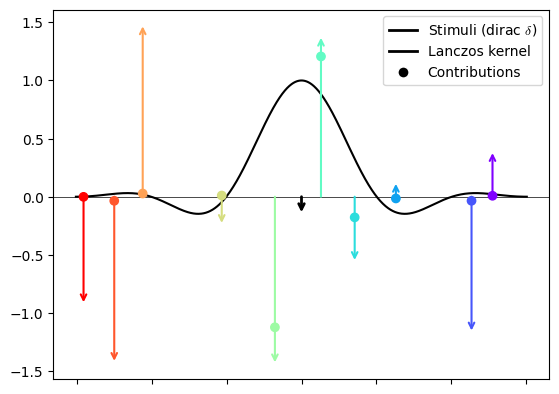

In [22]:
cutoff_freq = 0.249
x = np.arange(-1.5/cutoff_freq,1.5/cutoff_freq,0.01)
sinc = np.sinc(2*cutoff_freq*x)
window = np.sinc(2*cutoff_freq*x/3)
ker = lanczos(x)

zero = [0] * len(x)

t = [-5.82, -5, -4.24, -2.13, -0.71, 0.52, 1.42, 2.52, 4.54, 5.1]
s = [-0.90802408, -1.4123037,   1.46564877, -0.2257763,  -1.42474819, 1.3675282,   -0.54438272,  0.11092259, -1.15099358,  0.37569802]


# Generate rainbow colors
colors = plt.cm.rainbow_r(np.linspace(0, 1, len(t)))

print(s)

s_prod = s * lanczos(t)

# plt.plot(x, sinc)
# plt.plot(x, window)
plt.plot(x, ker, color="black")
# POINTS
plt.scatter(t, s_prod, color=colors, zorder=5)

# draw vertical arrows from the x-axis (y=0) to each point (xi, yi)



for i, (xi, yi) in enumerate(zip(t, s)):
    plt.annotate(
        '',
        xy=(xi, yi),
        xytext=(xi, 0),
        arrowprops=dict(arrowstyle='->', color=colors[i], lw=1.5, shrinkA=0, shrinkB=0),
    )

res = np.sum(s_prod)
plt.annotate(
    '',
    xy=(0, res),
    xytext=(0, 0),
    arrowprops=dict(arrowstyle='->', color='black', lw=2, shrinkA=0, shrinkB=0),
)
plt.scatter(t, s, color="white", zorder=-1)
plt.axhline(0, color='black', linewidth=0.5) # Add a line for y=0
plt.tick_params(axis='x',              # Specify the x-axis
               which='both',          # Apply to major and minor ticks
               bottom=True,           # Keep the ticks at the bottom
               top=False,             # (Optional) Turn off ticks at the top
               labelbottom=False)     # **Crucially: Turn off the tick labels**

# LEGEND CREATION
legend_elements = [
    # Black line for "Semantic Stimuli (step)"
    Line2D([0], [0], color='black', lw=2, label='Stimuli (dirac $\delta$)'),
    # Black line for "Lanczos kernel"
    Line2D([0], [0], color='black', lw=2, label='Lanczos kernel'),
    # Black dot marker for "Contributions" (linestyle='' means no line, only marker)
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=8, linestyle='', label='Contributions')
]

# Add the legend to the plot
plt.legend(handles=legend_elements, frameon=True)

plt.savefig(f"delta-{datetime.now()}.svg", format="svg")

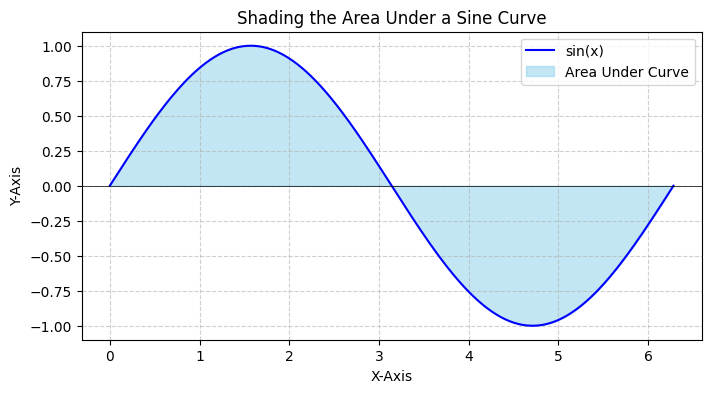

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Define the data
# Generate x values from 0 to 2*pi
x = np.linspace(0, 2 * np.pi, 500)
# Calculate the corresponding y values (e.g., a sine wave)
y = np.sin(x)

# 2. Start the plot
plt.figure(figsize=(8, 4))

# 3. Plot the curve (optional)
plt.plot(x, y, color='blue', label='sin(x)')

# 4. Use fill_between to shade the area
#   - x: The x-coordinates
#   - y1: The y-coordinates of the upper boundary (the curve)
#   - y2: The y-coordinates of the lower boundary (default is 0, but explicitly setting it)
plt.fill_between(x, y, 0, color='skyblue', alpha=0.5, label='Area Under Curve')

# 5. Customize the plot
plt.title('Shading the Area Under a Sine Curve')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='black', linewidth=0.5) # Add a line for y=0

# 6. Show the plot
plt.legend()
plt.show()

In [10]:
from scipy.special import sici

def lanczos_integral(t, window=3, cutoff=1 / 2):
    """Returns the integral of a lanczos kernel with 'window' lobes evaluated at time t"""
    t = np.clip(t * cutoff, -window, window)
    vals = np.nan_to_num(
        (
            -2 * window * np.sin(np.pi * t) * np.sin((np.pi * t) / window)
            - (-1 + window) * np.pi * t * sici(((-1 + window) * np.pi * t) / window)[0]
            + (1 + window) * np.pi * t * sici(((1 + window) * np.pi * t) / window)[0]
        )
        / (2 * np.pi**2 * t)
    )
    return vals

def get_continual_lanczos_mat(word_times, tr_times, cutoff=1 / 2):
    lanc_mat = lanczos_integral(
        np.append(word_times, tr_times[-1]), cutoff=cutoff
    )
    lanc_mat = np.diff(lanc_mat)
    return lanc_mat

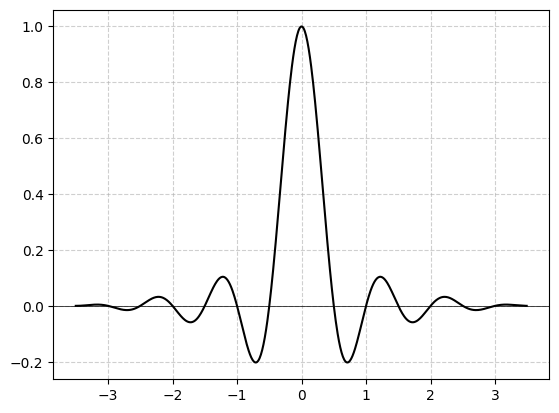

In [11]:
cutoff_freq = 1
a = 7

x = np.arange(-a/2/cutoff_freq,a/2/cutoff_freq,0.01)
ker = lanczos(x, cutoff_freq=1, lobes=a)

plt.plot(x, ker, color="black")

plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='black', linewidth=0.5) # Add a line for y=0
# plt.tick_params(axis='x',              # Specify the x-axis
#                which='both',          # Apply to major and minor ticks
#                bottom=True,           # Keep the ticks at the bottom
#                top=False,             # (Optional) Turn off ticks at the top
#                labelbottom=False)     # **Crucially: Turn off the tick labels**

In [12]:
plt.rcParams['mathtext.fontset'] = "cm"

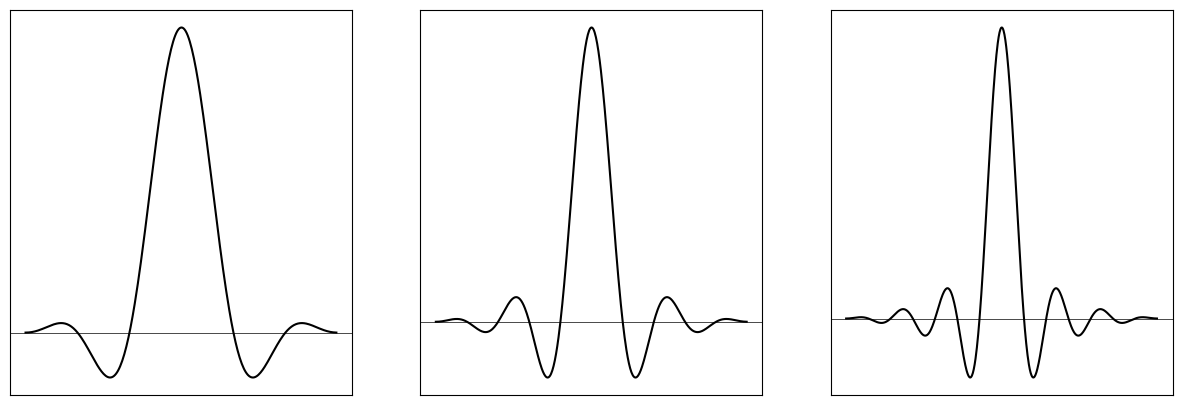

In [13]:
# Define the 'a' values for the three plots
a_values = [3, 5, 7]
cutoff_freq = 1
# Define the range for x

# 1. Create a figure and a set of subplots
# nrows=1, ncols=3. figsize controls the overall size of the image.
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5)) 
# 

# 2. Iterate through the 'a' values and the subplot axes
for i, a in enumerate(a_values):
    x = np.arange(-a/2/cutoff_freq, a/2/cutoff_freq, 0.01)
    # Calculate the kernel for the current 'a'
    ker = lanczos(x, cutoff_freq=cutoff_freq, lobes=a)
    
    # Select the current axis (subplot)
    ax = axes[i]
    
    # Plot the curve
    ax.plot(x, ker, color="black")
    
    # Add grid, horizontal line, and title to the subplot
    # ax.grid(True, linestyle='--', alpha=0.6)
    ax.axhline(0, color='black', linewidth=0.5)
    
    # Label the subplot with the corresponding 'a' value (L_a(x))
    # We use LaTeX for the label for consistency with the main title
    # ax.set_title(f'$a={a}$')
    ax.tick_params(axis='both',              # Specify the x-axis
                which='both',          # Apply to major and minor ticks
                bottom=False,           # Keep the ticks at the bottom
                top=False,             # (Optional) Turn off ticks at the top
                left=False,
                labelbottom=False,
                labelleft=False)     # **Crucially: Turn off the tick labels**

# 3. Add the main title to the entire figure
# Use fig.suptitle for a title that spans the whole figure.
# The characters $L_a(x)$ are enclosed in $$ to render as LaTeX.
# fig.suptitle(r'$L_a(x)$ Values of $a$', fontsize=16)

# 4. Adjust layout to prevent titles and labels from overlapping


# 5. Display the plot (or save it)
plt.show()

lm:  [ 0.0045069   0.01067759 -0.08640878  0.2407502   0.57852852  0.27860715
  0.02218    -0.06305697  0.00784111  0.00340163]
[-0.00409237 -0.01508001 -0.12664492 -0.05435569 -0.82425746  0.38100313
 -0.01207441 -0.00699444 -0.00902507  0.00127798]


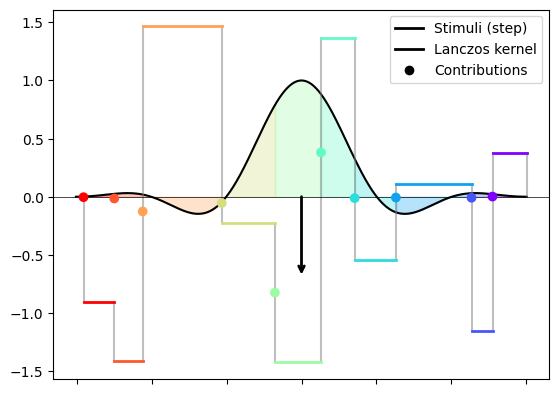

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Assuming lanczos is defined in your environment as per your snippet
# If not, you can uncomment the following line for testing:
# def lanczos(x): return np.sinc(x) * np.sinc(x/3) 

cutoff_freq = 0.249
x = np.arange(-1.5/cutoff_freq, 1.5/cutoff_freq, 0.01)
sinc = np.sinc(2*cutoff_freq*x)
window = np.sinc(2*cutoff_freq*x/3)
ker = lanczos(x)

zero = [0] * len(x)

t = [-5.82, -5, -4.24, -2.13, -0.71, 0.52, 1.42, 2.52, 4.54, 5.1]
s = [-0.90802408, -1.4123037,   1.46564877, -0.2257763,  -1.42474819, 1.3675282,   -0.54438272,  0.11092259, -1.15099358,  0.37569802]

lm = get_continual_lanczos_mat(t, x)
print("lm: ", lm)
lanczos_areas = np.multiply(lm, s)
print(lanczos_areas)

# Generate rainbow colors
colors = plt.cm.rainbow_r(np.linspace(0, 1, len(t)))


# plt.plot(x, sinc)
# plt.plot(x, window)
plt.plot(x, ker, color="black")

plt.scatter(t, lanczos_areas, color=colors, zorder=5)

ALPHA = 0.5

# POINTS (Replaced with Shading Logic)
plt.plot([t[0],t[0]], [0, s[0]], color='grey', alpha=ALPHA)
plt.plot([x[-1],x[-1]], [0, s[-1]], color='grey', alpha=ALPHA)
for i in range(len(t)):
    # Define start of the interval (current arrow)
    start_x = t[i]
    
    # Define end of the interval
    if i < len(t) - 1:
        # Stop at the next arrow
        end_x = t[i+1]
        plt.plot([end_x, end_x], [s[i],s[i+1]], color='grey', alpha=ALPHA)
    else:
        # For the last arrow, stop at the end of the curve
        end_x = x[-1]
        
        
    # Create a mask to select the section of the curve to shade
    mask = (x >= start_x) & (x <= end_x)

    plt.plot([start_x, end_x], [s[i], s[i]], color=colors[i], lw=2)
    
    # Shade the area under the curve using the current arrow's color
    plt.fill_between(x[mask], ker[mask], color=colors[i], alpha=0.3)

# # draw vertical arrows from the x-axis (y=0) to each point (xi, yi)
# for i, (xi, yi) in enumerate(zip(t, s)):
#     plt.annotate(
#         '',
#         xy=(xi, yi),
#         xytext=(xi, 0),
#         arrowprops=dict(arrowstyle='->', color=colors[i], lw=1.5, shrinkA=0, shrinkB=0),
#     )



res = np.sum(lanczos_areas)
plt.annotate(
    '',
    xy=(0, res),
    xytext=(0, 0),
    arrowprops=dict(arrowstyle='->', color='black', lw=2, shrinkA=0, shrinkB=0),
)
plt.scatter(t, s, color="white", zorder=-1)
# plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='black', linewidth=0.5, ) # Add a line for y=0
plt.tick_params(axis='x',              # Specify the x-axis
               which='both',          # Apply to major and minor ticks
               bottom=True,           # Keep the ticks at the bottom
               top=False,             # (Optional) Turn off ticks at the top
               labelbottom=False)     # **Crucially: Turn off the tick labels**

# LEGEND CREATION
legend_elements = [
    # Black line for "Semantic Stimuli (step)"
    Line2D([0], [0], color='black', lw=2, label='Stimuli (step)'),
    # Black line for "Lanczos kernel"
    Line2D([0], [0], color='black', lw=2, label='Lanczos kernel'),
    # Black dot marker for "Contributions" (linestyle='' means no line, only marker)
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=8, linestyle='', label='Contributions')
]

# Add the legend to the plot
plt.legend(handles=legend_elements, frameon=True)

plt.savefig(f"step-{datetime.now()}.svg", format="svg")

plt.show()

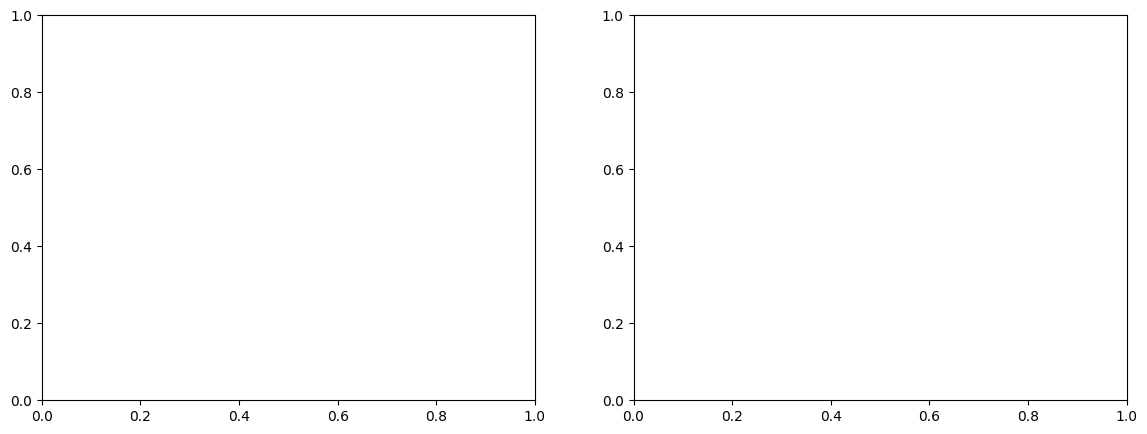

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))